<a href="https://colab.research.google.com/github/IT21268830/DL-LAB07/blob/main/lab_7_AE_CNN_Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-1.16578147e-01],
         [ 1.05315804e+00],
         [ 9.82931376e-01],
         ...,
         [ 1.16366458e+00],
         [ 1.58338010e+00],
         [-1.02383411e+00]],

        [[ 3.26075220e+00],
         [-7.00995445e-01],
         [-6.15167797e-01],
         ...,
         [-3.81829999e-02],
         [-9.39632833e-01],
         [-1.73630333e+00]],

        [[-1.88612974e+00],
         [-6.07627928e-01],
         [ 3.26727591e-02],
         ...,
         [-2.44713649e-01],
         [ 7.91967869e-01],
         [-2.72865564e-01]],

        ...,

        [[ 8.28351915e-01],
         [ 7.45989740e-01],
         [ 1.05118787e+00],
         ...,
         [ 1.19370198e+00],
         [-3.15146059e-01],
         [ 1.15609884e+00]],

        [[-5.00918210e-01],
         [-1.34458947e+00],
         [-6.40152693e-01],
         ...,
         [ 1.38766909e+00],
         [-4.86818373e-01],
         [ 5.12909114e-01]],

      

In [6]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [7]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

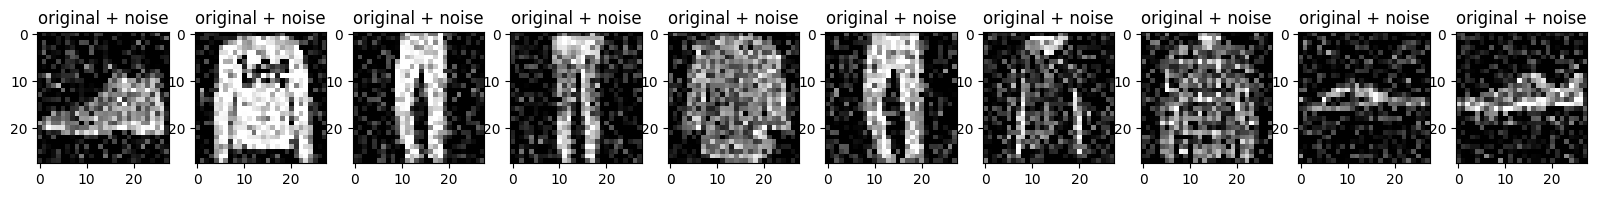

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [9]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
autoencoder = Denoise()

In [13]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 12

In [16]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

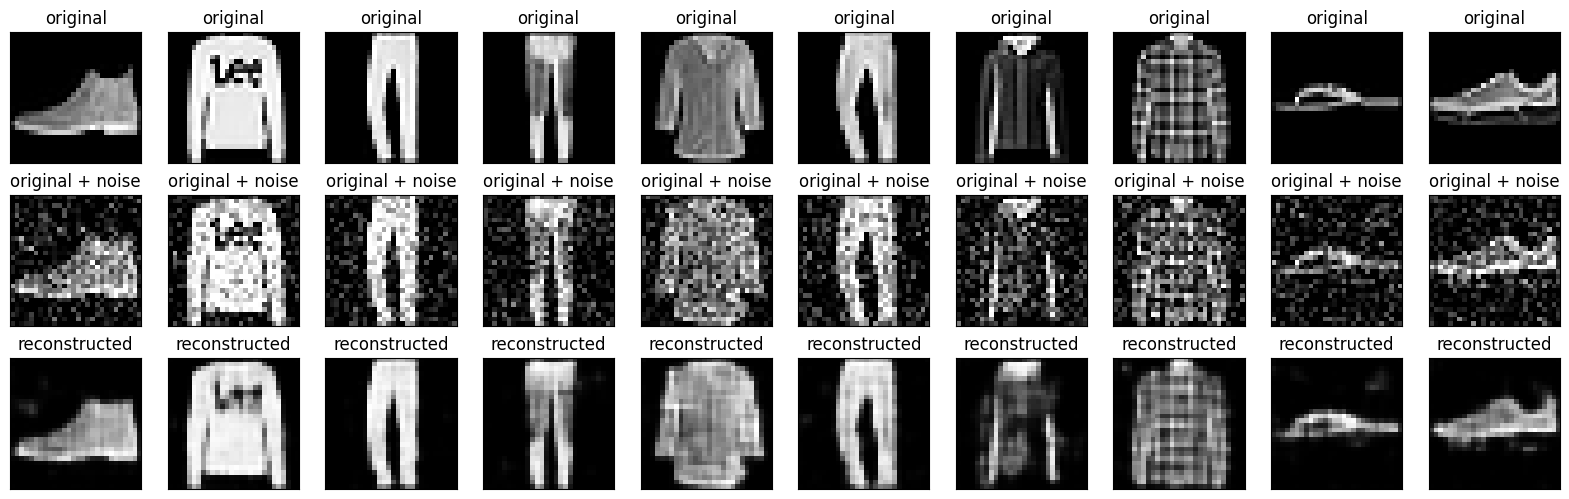

In [19]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Get the reconstructed images for the test dataset
decoded_imgs_test = autoencoder(x_test_noisy)

# Calculate the Mean Squared Error (MSE) for the test dataset
mse_loss = tf.keras.losses.MeanSquaredError()

# Apply the MSE to compare the original test images and the reconstructed images
test_loss = mse_loss(x_test, decoded_imgs_test).numpy()

print(f"Test Loss (Mean Squared Error): {test_loss}")

In [ ]:
# Train the model and store the training history
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot the training and validation loss against the number of epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# List of different noise factors to experiment with
noise_factors = [0.1, 0.2, 0.3, 0.4, 0.5]

# Function to add noise and plot images
def add_noise_and_train(noise_factor):
    print(f"\nTraining with noise_factor: {noise_factor}")

    # Add noise to the training and test sets
    x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
    x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

    # Clip the values to ensure they're between 0 and 1
    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

    # Visualize the effect of the noise on the test images
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.title(f"noise_factor: {noise_factor}")
        plt.imshow(tf.squeeze(x_test_noisy[i]))
        plt.gray()
    plt.show()

    # Train the autoencoder with noisy data
    history = autoencoder.fit(x_train_noisy, x_train,
                              epochs=10,
                              shuffle=True,
                              validation_data=(x_test_noisy, x_test),
                              verbose=0)

    # Get final validation loss after training
    val_loss = history.history['val_loss'][-1]

    # Return the validation loss and plot
    return val_loss

# Dictionary to store the results of noise factors and their corresponding validation losses
noise_factor_results = {}

# Loop through different noise_factor values and observe their effects
for noise_factor in noise_factors:
    val_loss = add_noise_and_train(noise_factor)
    noise_factor_results[noise_factor] = val_loss
    print(f"Validation Loss for noise_factor {noise_factor}: {val_loss}")

# Find the best noise factor with the lowest validation loss
best_noise_factor = min(noise_factor_results, key=noise_factor_results.get)
print(f"\nBest noise_factor: {best_noise_factor} with Validation Loss: {noise_factor_results[best_noise_factor]}")
